In [26]:
import prior

dataset = prior.load_dataset("procthor-10k")
dataset

[AI2-THOR WARNING] There has been an update to ProcTHOR-10K that must be used with AI2-THOR version 5.0+. To use the new version of ProcTHOR-10K, please update AI2-THOR to version 5.0+ by running:
    pip install --upgrade ai2thor
Alternatively, to downgrade to the old version of ProcTHOR-10K, run:
   prior.load_dataset("procthor-10k", revision="ab3cacd0fc17754d4c080a3fd50b18395fae8647")


Loading test: 100%|██████████| 1000/1000 [00:00<00:00, 6501.62it/s]


DatasetDict(
    train=Dataset(
    dataset=procthor-dataset,
    size=10000,
    split=train
),
    val=Dataset(
    dataset=procthor-dataset,
    size=1000,
    split=val
),
    test=Dataset(
    dataset=procthor-dataset,
    size=1000,
    split=test
)
)

In [27]:
dataset["train"]

Dataset(
    dataset=procthor-dataset,
    size=10000,
    split=train
)

In [28]:
INDEX = 0 
house = dataset["train"][INDEX]
type(house), house.keys(), house

(dict,
 dict_keys(['doors', 'metadata', 'objects', 'proceduralParameters', 'rooms', 'walls', 'windows']),
 {'doors': [{'assetId': 'Doorway_6',
    'id': 'door|1|2',
    'openable': False,
    'openness': 0,
    'room0': 'room|2',
    'room1': 'room|2',
    'wall0': 'wall|2|5.99|3.99|5.99|5.99',
    'wall1': 'wall|exterior|5.99|3.99|5.99|5.99',
    'holePolygon': [{'x': 0.4987163812589276, 'y': 0, 'z': 0},
     {'x': 1.5362947256040203, 'y': 2.1068506240844727, 'z': 0}],
    'assetPosition': {'x': 1.016530884310268,
     'y': 1.0534253120422363,
     'z': 0}}],
  'metadata': {'agent': {'horizon': 30,
    'position': {'x': 3.5, 'y': 0.95, 'z': 2.0},
    'rotation': {'x': 0, 'y': 90, 'z': 0},
    'standing': True},
   'roomSpecId': 'kitchen',
   'schema': '1.0.0',
   'warnings': {},
   'agentPoses': {'arm': {'horizon': 30,
     'position': {'x': 3.5, 'y': 0.95, 'z': 2.0},
     'rotation': {'x': 0, 'y': 90, 'z': 0},
     'standing': True},
    'default': {'horizon': 30,
     'position': {'

In [29]:
print(house.keys())

dict_keys(['doors', 'metadata', 'objects', 'proceduralParameters', 'rooms', 'walls', 'windows'])


In [30]:
data = house
print(data.keys())
print(data['walls'])

dict_keys(['doors', 'metadata', 'objects', 'proceduralParameters', 'rooms', 'walls', 'windows'])
[{'color': {'b': 0.27450980392156865, 'g': 0.25098039215686274, 'r': 0.3764705882352941}, 'id': 'wall|2|0.00|0.00|0.00|3.99', 'material': {'name': 'PureWhite', 'color': {'b': 0.27450980392156865, 'g': 0.25098039215686274, 'r': 0.3764705882352941}}, 'polygon': [{'x': 0.0, 'y': 0, 'z': 0.0}, {'x': 0.0, 'y': 0, 'z': 3.99}, {'x': 0.0, 'y': 4.551928794929904, 'z': 0.0}, {'x': 0.0, 'y': 4.551928794929904, 'z': 3.99}], 'roomId': 'room|2'}, {'color': {'b': 0.27450980392156865, 'g': 0.25098039215686274, 'r': 0.3764705882352941}, 'id': 'wall|2|0.00|3.99|5.99|3.99', 'material': {'name': 'PureWhite', 'color': {'b': 0.27450980392156865, 'g': 0.25098039215686274, 'r': 0.3764705882352941}}, 'polygon': [{'x': 0.0, 'y': 0, 'z': 3.99}, {'x': 5.985, 'y': 0, 'z': 3.99}, {'x': 0.0, 'y': 4.551928794929904, 'z': 3.99}, {'x': 5.985, 'y': 4.551928794929904, 'z': 3.99}], 'roomId': 'room|2'}, {'color': {'b': 0.274509

KeyError: 'type'

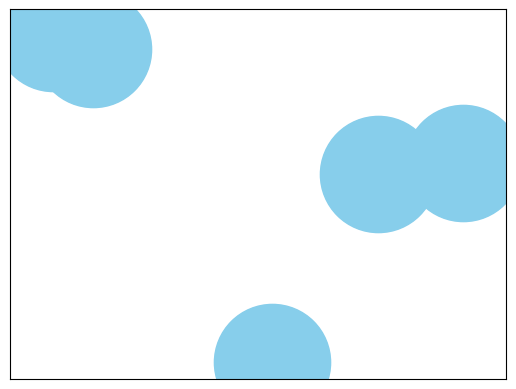

In [31]:
import networkx as nx
data = house
import matplotlib.pyplot as plt
G = nx.DiGraph()

# Add rooms as nodes
rooms = ['kitchen', 'exterior']
for room in rooms:
    G.add_node(room, type='room')

# Add doors as nodes and edges
for door in data['doors']:
    door_id = door['id']
    room0 = door['room0']
    room1 = door['room1']
    G.add_node(door_id, type='door')
    G.add_edge(room0, door_id)
    G.add_edge(door_id, room1)

# Add walls as nodes and edges


# Add agent as a node
agent_position = data['metadata']['agent']['position']
agent_rotation = data['metadata']['agent']['rotation']
agent_id = 'agent'
G.add_node(agent_id, type='agent', position=agent_position, rotation=agent_rotation)
G.add_edge('kitchen', agent_id)  # Assuming agent is in the kitchen

# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=7000, node_color='skyblue')

# Draw edges
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), arrows=True)

# Draw labels
labels = {n: f"{n}\n({d['type']})" for n, d in G.nodes(data=True)}
nx.draw_networkx_labels(G, pos, labels, font_size=12)

plt.title('Scene Graph')
plt.show()

In [32]:
from ai2thor.controller import Controller
import ai2thor_colab

In [33]:
ai2thor_colab.start_xserver()

In [34]:
house = dataset["train"][INDEX]
controller = Controller(scene=house)

  warnings.warn(



Exception: The following builds were found, but had missing dependencies. Only one valid platform is required to run AI2-THOR.
Platform Linux64 failed validation with the following errors: No valid X display found
  Linux64 requires a X11 server to be running with GLX. If you have a NVIDIA GPU, please run: sudo ai2thor-xorg start

In [22]:
from PIL import Image

Image.fromarray(controller.last_event.frame)

NameError: name 'controller' is not defined

In [23]:
event = controller.step(action="LookDown")
Image.fromarray(event.frame)

NameError: name 'controller' is not defined

In [24]:
event = controller.step(action="LookUp")
Image.fromarray(event.frame)

NameError: name 'controller' is not defined

In [25]:
event = controller.step(action = "RotateRight")
Image.fromarray(event.frame)

NameError: name 'controller' is not defined

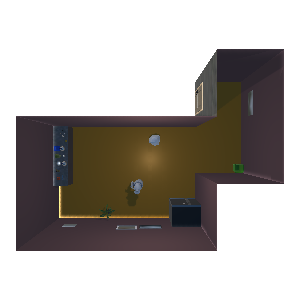

In [37]:
import copy

def get_top_down_frame():
    # Setup the top-down camera
    event = controller.step(action="GetMapViewCameraProperties", raise_for_failure=True)
    pose = copy.deepcopy(event.metadata["actionReturn"])

    bounds = event.metadata["sceneBounds"]["size"]
    max_bound = max(bounds["x"], bounds["z"])

    pose["fieldOfView"] = 50
    pose["position"]["y"] += 1.1 * max_bound
    pose["orthographic"] = False
    pose["farClippingPlane"] = 50
    del pose["orthographicSize"]

    # add the camera to the scene
    event = controller.step(
        action="AddThirdPartyCamera",
        **pose,
        skyboxColor="white",
        raise_for_failure=True,
    )
    top_down_frame = event.third_party_camera_frames[-1]
    return Image.fromarray(top_down_frame)


get_top_down_frame()

In [38]:
event = controller.step(action="GetReachablePositions")
event.metadata["actionReturn"]

[{'x': 3.5, 'y': 0.9009997844696045, 'z': 1.5},
 {'x': 3.75, 'y': 0.9009997844696045, 'z': 1.5},
 {'x': 3.5, 'y': 0.9009997844696045, 'z': 1.75},
 {'x': 3.25, 'y': 0.9009997844696045, 'z': 1.5},
 {'x': 3.5, 'y': 0.9009997844696045, 'z': 1.25},
 {'x': 4.0, 'y': 0.9009997844696045, 'z': 1.5},
 {'x': 3.75, 'y': 0.9009997844696045, 'z': 1.75},
 {'x': 3.75, 'y': 0.9009997844696045, 'z': 1.25},
 {'x': 3.5, 'y': 0.9009997844696045, 'z': 2.0},
 {'x': 3.25, 'y': 0.9009997844696045, 'z': 1.75},
 {'x': 3.0, 'y': 0.9009997844696045, 'z': 1.5},
 {'x': 3.25, 'y': 0.9009997844696045, 'z': 1.25},
 {'x': 3.5, 'y': 0.9009997844696045, 'z': 1.0},
 {'x': 4.25, 'y': 0.9009997844696045, 'z': 1.5},
 {'x': 4.0, 'y': 0.9009997844696045, 'z': 1.75},
 {'x': 4.0, 'y': 0.9009997844696045, 'z': 1.25},
 {'x': 3.75, 'y': 0.9009997844696045, 'z': 2.0},
 {'x': 3.75, 'y': 0.9009997844696045, 'z': 1.0},
 {'x': 3.5, 'y': 0.9009997844696045, 'z': 2.25},
 {'x': 3.25, 'y': 0.9009997844696045, 'z': 2.0},
 {'x': 3.0, 'y': 0.90

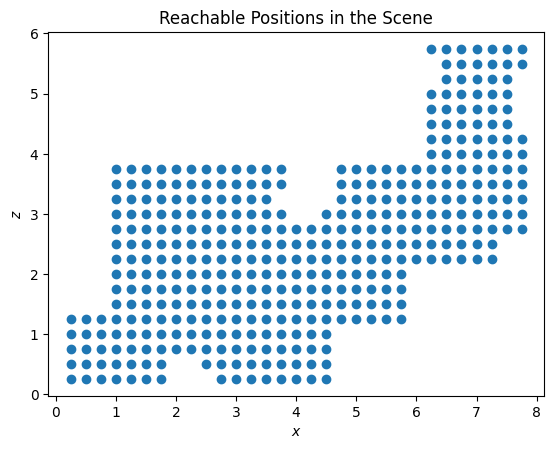

In [39]:
import matplotlib.pyplot as plt
reachable_positions = event.metadata["actionReturn"]
xs = [rp["x"] for rp in reachable_positions]
zs = [rp["z"] for rp in reachable_positions]

fig, ax = plt.subplots(1, 1)
ax.scatter(xs, zs)
ax.set_xlabel("$x$")
ax.set_ylabel("$z$")
ax.set_title("Reachable Positions in the Scene")
ax.set_aspect("equal")

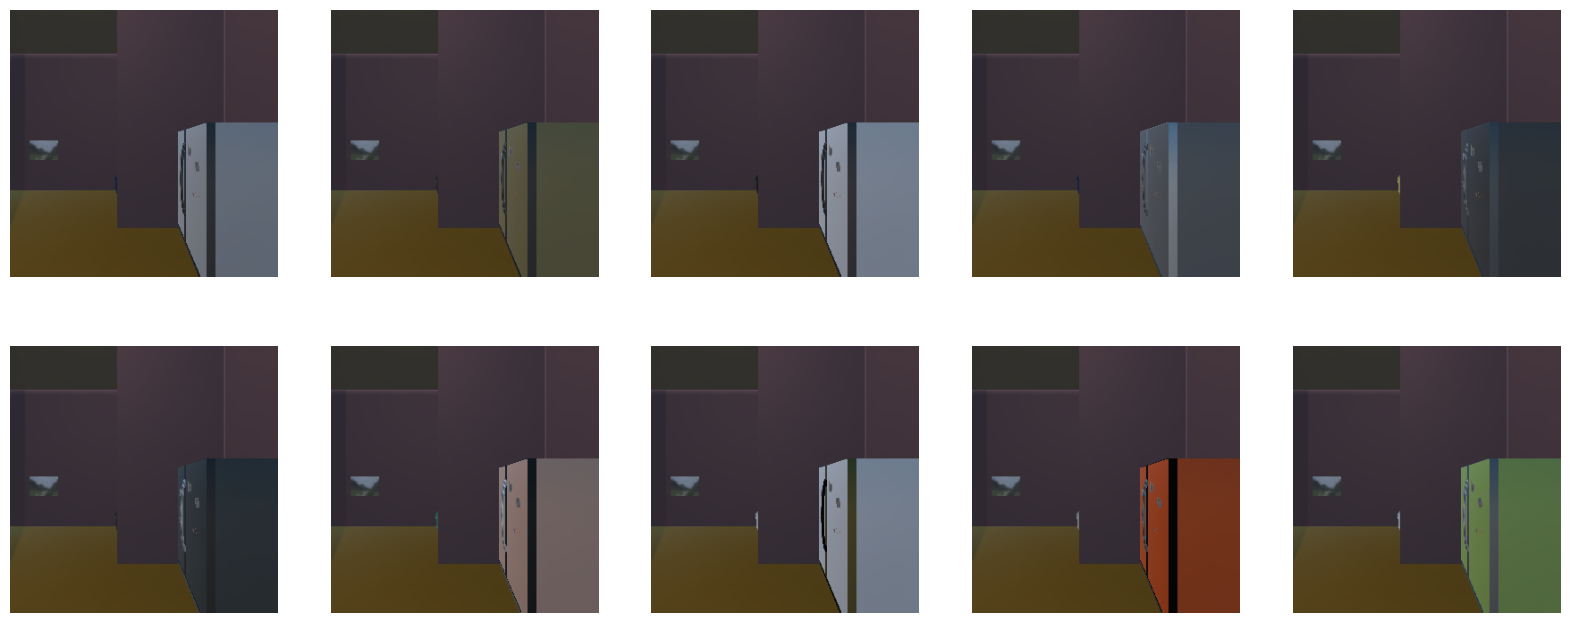

In [40]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
controller.step(action="RotateLeft")
for ax in axs.flat:
    event = controller.step(action="RandomizeMaterials")
    ax.imshow(event.frame)
    ax.axis("off")